# Interactive Visualization of Clean vs Perturbed Datasets

This notebook provides an **interactive** visualization of encoded prefixes from clean and perturbed datasets in 2D space using PCA dimensionality reduction.

## Features:
- **Hover over points** to see detailed prefix information (using Plotly)
- **Rich tooltips** showing case ID, prefix length, and tensor information for both datasets
- **Zoom and pan** capabilities
- **Interactive legend** to show/hide datasets

The visualization shows:
- **Blue dots**: Clean dataset prefixes
- **Orange dots**: Perturbed dataset prefixes

Hover over any point to see its prefix details for both the clean and perturbed versions!

In [7]:
# Install plotly if not already installed
try:
    import plotly.graph_objects as go
    import plotly.express as px
    print("✓ plotly is already installed")
except ImportError:
    print("Installing plotly...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", "plotly"])
    import plotly.graph_objects as go
    import plotly.express as px
    print("✓ plotly installed successfully")

Installing plotly...
✓ plotly installed successfully


In [8]:
import sys
import os
from pathlib import Path

# Add path to import from perturbation_logic
# Notebook is in robustness/perturbator/, module is in robustness/perturbator/perturbation_logic/
perturbation_logic_path = os.path.join(os.getcwd(), 'perturbation_logic')
if os.path.exists(perturbation_logic_path):
    sys.path.insert(0, perturbation_logic_path)
else:
    # Try alternative path if running from different directory
    perturbation_logic_path = 'perturbation_logic'
    if os.path.exists(perturbation_logic_path):
        sys.path.insert(0, perturbation_logic_path)

from viszuliazion_backend_2 import (
    create_interactive_visualization,
    load_data_with_prefixes,
    match_clean_perturbed_pairs
)

print("✓ Imports successful!")

✓ Imports successful!


## Setup: Define Data Paths

Set the paths to the clean and perturbed dataset files.

In [9]:
# Define paths to the datasets
# Adjust these paths if running from a different directory
base_path = Path('../../encoded_data/helpdesk')

clean_data_path = base_path / 'val.pkl'
perturbed_data_path = base_path / 'last_event_attack.pkl'

print(f"Clean dataset: {clean_data_path}")
print(f"Perturbed dataset: {perturbed_data_path}")

# Check if files exist
if not clean_data_path.exists():
    print(f"⚠ Warning: Clean dataset not found at {clean_data_path}")
if not perturbed_data_path.exists():
    print(f"⚠ Warning: Perturbed dataset not found at {perturbed_data_path}")

Clean dataset: ../../encoded_data/helpdesk/val.pkl
Perturbed dataset: ../../encoded_data/helpdesk/last_event_attack.pkl


## Data Statistics

Load and examine the datasets to understand their structure and dimensions.

In [10]:
# Load and extract prefixes to get statistics
try:
    clean_data, clean_metadata, clean_keys = load_data_with_prefixes(str(clean_data_path))
    perturbed_data, perturbed_metadata, perturbed_keys = load_data_with_prefixes(str(perturbed_data_path))
    
    print("=" * 60)
    print("Dataset Statistics")
    print("=" * 60)
    print(f"Clean dataset:")
    print(f"  - Number of samples: {len(clean_data)}")
    print(f"  - Feature dimensions: {clean_data.shape[1]}")
    print(f"\nPerturbed dataset:")
    print(f"  - Number of samples: {len(perturbed_data)}")
    print(f"  - Feature dimensions: {perturbed_data.shape[1]}")
    
    # Match pairs
    clean_to_perturbed = match_clean_perturbed_pairs(clean_keys, perturbed_keys)
    print(f"\nMatched pairs: {len(clean_to_perturbed)}")
    print(f"  - Clean samples with matches: {len(clean_to_perturbed)}")
    print(f"  - Perturbed samples with matches: {len(set(clean_to_perturbed.values()))}")
    print("=" * 60)
    
    if clean_data.shape[1] != perturbed_data.shape[1]:
        print("⚠ Warning: Feature dimensions don't match!")
    else:
        print("✓ Feature dimensions match - ready for visualization")
        
except Exception as e:
    print(f"Error loading data: {e}")
    raise

Dataset Statistics
Clean dataset:
  - Number of samples: 1898
  - Feature dimensions: 288

Perturbed dataset:
  - Number of samples: 1898
  - Feature dimensions: 288

Matched pairs: 1898
  - Clean samples with matches: 1898
  - Perturbed samples with matches: 1898
✓ Feature dimensions match - ready for visualization


## Interactive Visualization

Create an interactive 2D scatter plot comparing clean and perturbed datasets using PCA dimensionality reduction.

**Instructions:**
- **Hover** over any point to see detailed prefix information for both clean and perturbed versions
- **Zoom** by scrolling or using the toolbar
- **Pan** by clicking and dragging
- **Toggle datasets** by clicking on legend items
- Tooltips show case ID, prefix length, and tensor information for both datasets

Loading clean dataset from: ../../encoded_data/helpdesk/val.pkl
Loaded 1898 clean samples with 288 features
Loading perturbed dataset from: ../../encoded_data/helpdesk/last_event_attack.pkl
Loaded 1898 perturbed samples with 288 features
Matching clean and perturbed pairs...
Matched 1898 pairs
Combining datasets for PCA fitting...
Fitting PCA model...
PCA explained variance: PC1=48.36%, PC2=19.37%, Total=67.73%


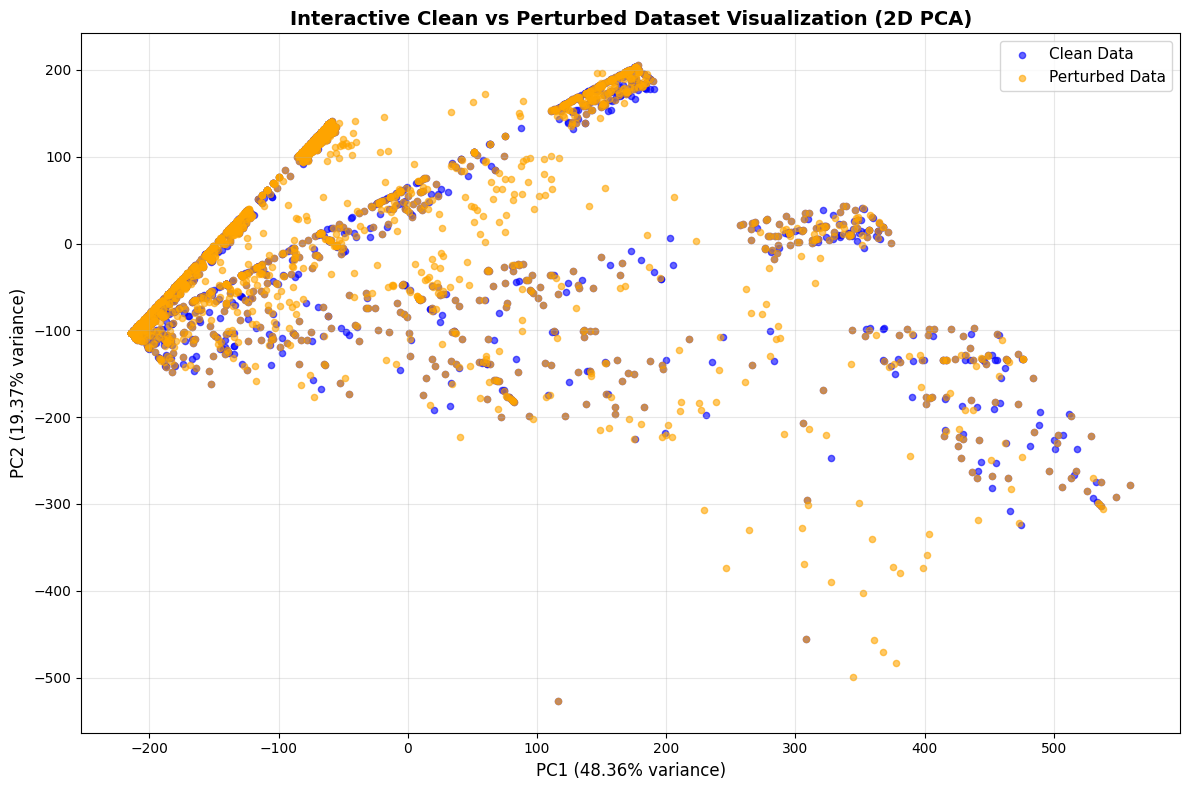

In [11]:
# Create interactive visualization
create_interactive_visualization(
    clean_data_path=str(clean_data_path),
    perturbed_data_path=str(perturbed_data_path),
    alpha=0.6,  # Transparency level
    figsize=(12, 8)  # Figure size
)